# Assignment 1

MIE1624 Introduction to Data Science and Analytics <br>
University of Toronto, Faculty of Engineering <br>
Author: Lydia Jeong <br>
October 12, 2020 <br>

### Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
%matplotlib inline
from scipy import stats
import math
import random
import statistics

     |████████████████████████████████| 9.5MB 5.4MB/s eta 0:00:01     |███▌                            | 1.0MB 5.1MB/s eta 0:00:02     |███████████████████████████████▉| 9.4MB 5.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 24.8MB/s eta 0:00:01


### Print the current version of Python:

In [3]:
import sys
print(sys.version)

3.6.11 | packaged by conda-forge | (default, Aug  5 2020, 20:09:42) 
[GCC 7.5.0]


## 1 Exploratory data analysis

The dataset was obtained from Kaggle: https://www.kaggle.com/c/kaggle-survey-2019/data

First, I read the clean version of the csv file and store it as a dataframe, df.

In [4]:
df = pd.read_csv('clean_kaggle_data.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (74,78,115,147,154,172,176,213,225,229,232) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The first five rows of the dataset are displayed to visually examine the data and see which columns might be relevant for our analysis.

In [5]:
df.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
3,4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,5,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,...,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1


Display the number of rows and columns in the data

In [6]:
df.shape

(12497, 247)

Display the column names

In [7]:
df.columns

Index(['Unnamed: 0', 'Time from Start to Finish (seconds)', 'Q1', 'Q2',
       'Q2_OTHER_TEXT', 'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=247)

From examining the dataset, it is apparent that the columns Q1, Q2, Q3, Q4, Q10, Q15, and Q23 contains the only relevant data for analysis, therefore, I have kept these columns and renamed them to appropriate names as shown in the table below:

| Q# | Question                                                                                                        | Renamed column |
|----|-----------------------------------------------------------------------------------------------------------------|---------------------|
| Q1  | What is your age (# years)?                                                                                     | **age**                |
| Q2  | What is your gender?                                                                                            | **gender**              |
| Q3  | In which country do you currently reside?                                                                       | **country**             |
| Q4  | What is the highest level of formal education that you have attained or plan to attain within the next 2 years? | **education**     |
| Q10 | What is your current yearly compensation (USD)?                                                                        | **salary** |
| Q15 | How long have you been writing code to analyze data (at work or at school)?                                     | **coding_experience**   |
| Q23 | For how many years have you used machine learning methods?                                                      | **ML_experience**|       |

In [8]:
# Filter only the relevant columns and rename them.
df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q10', 'Q15','Q23']]
df.columns = ['age', 'gender', 'country', 'education', 'salary', 'coding_experience', 'ML_experience']

In [9]:
# Diaplay first 5 rows of the new dataframe.
df.head()

,age,gender,country,education,salary,coding_experience,ML_experience
0,22-24,Male,France,Master’s degree,40000,1-2 years,1-2 years
1,40-44,Male,India,Professional degree,7500,I have never written code,NaN
2,40-44,Male,Australia,Master’s degree,300000,1-2 years,2-3 years
3,22-24,Male,India,Bachelor’s degree,5000,< 1 years,< 1 years
4,50-54,Male,France,Master’s degree,70000,20+ years,10-15 years


For the exploratory data analysis, I would like to examine the trend in the data that specifically relates to the effect of gender and education on the income level. I have plotted three figures for the following characteristics:
1. Salary by education level and gender.
2. Salary by professional experience and gender (machine learning experience was considered as professional experience).
3. Salary by gender in different countries.

### 1.1 Salary by education level and gender.

It is important to determine what groups are present in the 'gender' and 'education' column and the sample size for each group. By using .value_counts() function, We can see that there are four categories in the 'gender' column as shown below. A relatively small number of samples belong to group 'Prefer not to say' and 'Prefer to self-describe'. Since I am interested comparing the salary between males and females, it makes sense to keep only these groups and drop the rest.

In [10]:
df['gender'].value_counts()

Male                       10473
Female                      1827
Prefer not to say            167
Prefer to self-describe       30
Name: gender, dtype: int64

In [11]:
# Keep only the groups that are 'Male' or 'Female'
df = df[(df['gender'] == 'Female') | (df['gender'] == 'Male')]
df['gender'].value_counts()

Male      10473
Female     1827
Name: gender, dtype: int64

For the 'education' column, there are seven groups. I have dropped these following four groups due to its relatively small sample size: "No formal education past high school", "I prefer not to answer", "Professional degree", and "Some college/university study without earning a bachelor’s degree".

In [12]:
df['education'].value_counts()

Master’s degree                                                      5794
Bachelor’s degree                                                    3321
Doctoral degree                                                      2042
Professional degree                                                   456
Some college/university study without earning a bachelor’s degree     401
I prefer not to answer                                                165
No formal education past high school                                  121
Name: education, dtype: int64

In [13]:
# Keep only the columns "Master's degree", "Bachelor's degree", and "Doctoral degree"
df = df[(df['education'] == "Master’s degree") | (df['education'] == "Bachelor’s degree") | (df['education'] == "Doctoral degree")]

Plot the figure displaying the average salary of males and females by the education level.

(array([0, 1, 2]),
 [Text(0, 0, 'Bachelor’s degree'),
  Text(1, 0, 'Master’s degree'),
  Text(2, 0, 'Doctoral degree')])

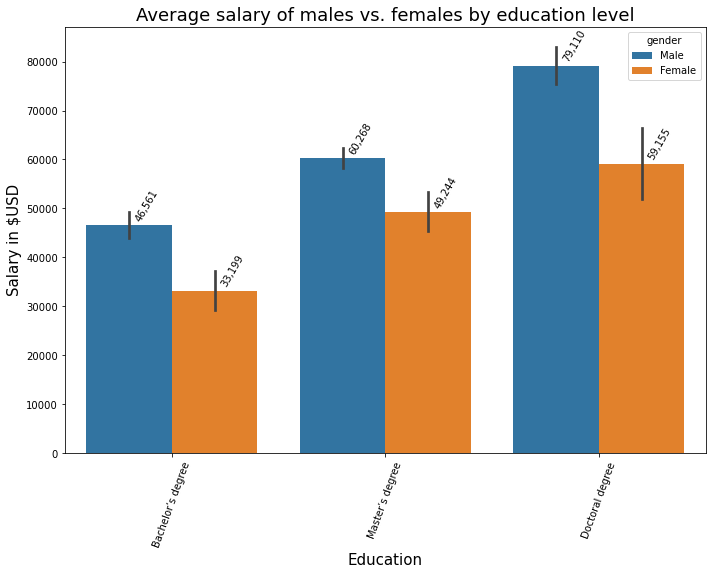

In [14]:
plt.figure(figsize=(10,7))

# group values by education level
groupedvalues=df.groupby('education').mean().reset_index()

# make a bar plot and sort bars in ascending order
plot = sns.barplot(x='education', y='salary', hue='gender', data=df,
           order=groupedvalues.sort_values('salary').education)
for p in plot.patches:
    plot.annotate('{0:,.0f}'.format(p.get_height()),
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center',
                  xytext = (18, 20), 
                  textcoords = 'offset points', rotation=60)

# set labels
plt.xlabel("Education", size=15)
plt.ylabel("Salary in $USD", size=15)
plt.title("Average salary of males vs. females by education level", size =18)
plt.tight_layout()
plt.xticks(rotation=70)

From the generated barplot, it is noticeable that the mean salary tend to increase as the level of education increases from Bachelor's to Doctoral degree. In addition, men tend to earn higher salary than women regardless of their level of education. The mean salary between males and females by their education is below: <br>

| Education          | Males    | Females |
|--------------------|----------|---------|
| Bachelor's degree  | 46,561   | 33,199  |
| Master's degree    | 60,268   | 49,244  |
| Doctoral degree    | 79,110   | 59,155  |

### 1.2 Salary by professional experience and gender (machine learning experience was considered as a professional experience)

For this analysis, we are interested in looking at the columns 'ML_experience' and 'gender'. I have displayed the groups or levels present in the 'ML_experience' column to see the sample size in each group. It appears that the majority of people have less than three years of experience using machine learning methods and very few have more than 20 years of experience.

In [15]:
df.ML_experience.value_counts()

< 1 years      2698
1-2 years      2450
2-3 years      1420
3-4 years       891
4-5 years       810
5-10 years      767
10-15 years     301
20+ years       165
Name: ML_experience, dtype: int64

Plot the figure displaying the average salary of males and females by the professional experience.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '< 1 years'),
  Text(1, 0, '1-2 years'),
  Text(2, 0, '2-3 years'),
  Text(3, 0, '3-4 years'),
  Text(4, 0, '4-5 years'),
  Text(5, 0, '5-10 years'),
  Text(6, 0, '10-15 years'),
  Text(7, 0, '20+ years')])

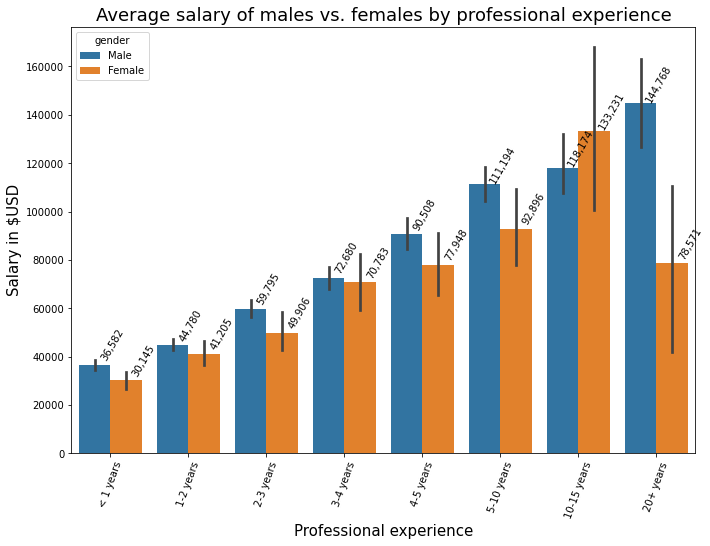

In [16]:
plt.figure(figsize=(10,7))

# group values by professional experience
groupedvalues=df.groupby('ML_experience').count().reset_index()

# make a bar plot and sort bars
plot = sns.barplot(x='ML_experience', y='salary', hue='gender', data=df,
           order=groupedvalues.sort_values('salary', ascending = False).ML_experience)
for p in plot.patches:
    plot.annotate('{0:,.0f}'.format(p.get_height()),
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center',
                  xytext = (18, 20), 
                  textcoords = 'offset points', rotation=60)

# set labels
plt.xlabel("Professional experience", size=15)
plt.ylabel("Salary in $USD", size=15)
plt.title("Average salary of males vs. females by professional experience", size =18)
plt.tight_layout()
plt.xticks(rotation=70)

The mean salary between males and females differed again, with males earning more than the females. The salary generally tended to increase with more years of professional experience, however, there are two interesting observations to note. First is that for people with 10-15 years of machine learning experience, surprisingly females earned more than males on average (their average salary was \\$133,231 vs. \$118,174 respectively). However, females in this group had higher variability as shown in the longer standard deviation line. The second interesting phenomenon was that for the group with 20+ experience, women earned significantly less income compared to the group that had less experience, as well as their male counterparts.

### 1.3 Salary by countries and gender

Since the 'country' column has 59 different countries, it is too much to show all the countries into one figure. Therefore, I decided to only include the top 15 countries that participated the most in this survey, i.e. countries with the largest sample size.

In [17]:
# See how many countries are present in the 'country' column
len(df['country'].value_counts())

59

In [18]:
# get top 15 countries with the largest sample
top_15 = df['country'].value_counts()[:15].reset_index()
top_15 = top_15['index'].to_list()
print(top_15)

['India', 'United States of America', 'Other', 'Brazil', 'Japan', 'Russia', 'Germany', 'United Kingdom of Great Britain and Northern Ireland', 'Spain', 'France', 'Canada', 'China', 'Nigeria', 'Australia', 'Italy']


In [19]:
# Filter rows where the country name is in these top 15 country list.
df.set_index('country', inplace=True)
df_top15 = df.loc[top_15]

df_top15.reset_index(inplace=True)

Plot the figure displaying the average salary of males and females by country.

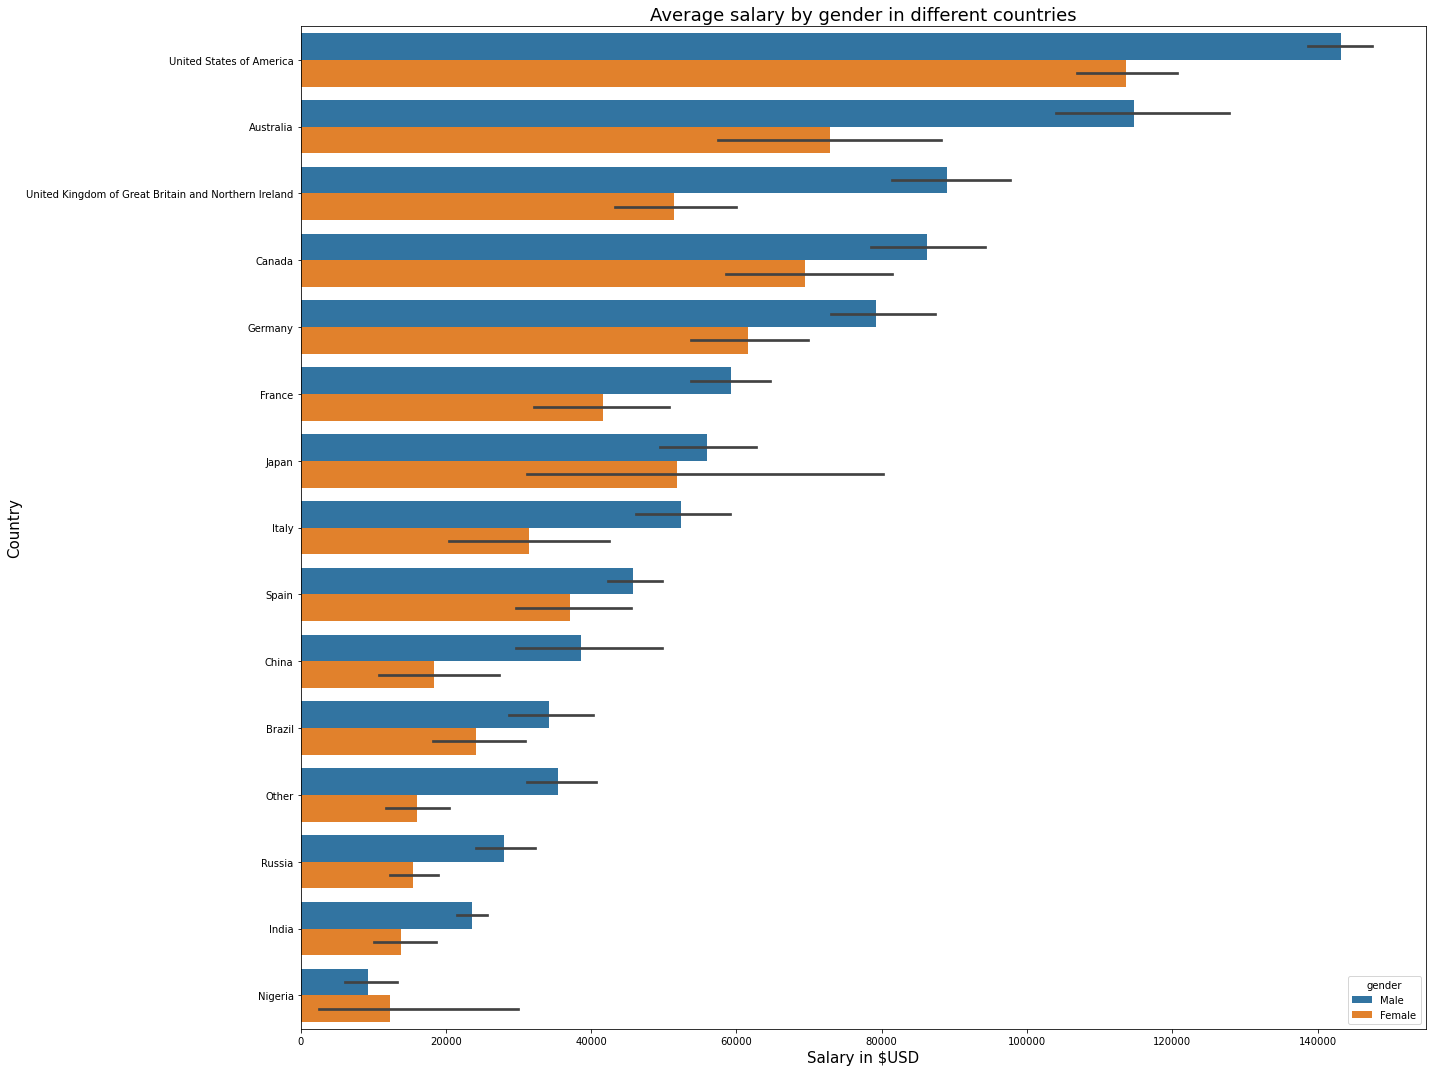

In [20]:
plt.figure(figsize=(20,15))

# group values by country experience
groupedvalues=df_top15.groupby('country').count().reset_index()

# sort the country by highest to lowest mean salary
df_top_15_salary = df_top15.groupby('country').mean().sort_values(by=['salary'], ascending=False)
df_top_15_salary.reset_index(inplace=True)
ordered = df_top_15_salary['country'].tolist()

# make a bar plot and sort bars
plot = sns.barplot(x='salary', y='country', hue='gender', data=df_top15, order=ordered)

# set labels
plt.xlabel("Salary in $USD", size=15)
plt.ylabel("Country", size=15)
plt.title("Average salary by gender in different countries", size =18)
plt.tight_layout()

For this graph, it is evident that people from U.S.A have the highest salary, followed by Australia, U.K., and Canada. It appears that the mean salary is higher for males than females for all the countries except for Nigeria. It is interesting to see that females actually earn more than males in this country, although females have an extremely high variability as shown in the high standard error.

## 2 Estimating the difference between average salary of males vs. females

### 2a) Descriptive statistics for each group (males and females)

To estimate the salary difference between males and females, I first filtered the relevant columns, 'gender' and 'salary' and named this dataframe df_gender. Then I checked to see if there were any missing values in these columns. Any missing data should be removed because it can lower the statistical power. There were no missing data present in this dataframe. Subsequently, I separated the female and male data into separate dataframes, df_female and df_male to compute the descriptive statistics for each group separately.

In [21]:
# Extract only the gender and salary column since they are the relevant columns for our analysis in this section.

df_gender = df[['gender', 'salary']]
df_gender.head() # Display the first 5 rows.

,gender,salary
country,,
France,Male,40000
Australia,Male,300000
India,Male,5000
France,Male,70000
India,Male,15000


In [22]:
# Check to see if there are any missing values in 'gender' and 'salary' columns. If there are no missing
#values, then the output will be False. As shown in the output, there are no missing values.

print(True in df['salary'].isna())
print(True in df['gender'].isna())

False
False


In [23]:
# Separate female and male data
df_female = df_gender[df_gender['gender'] == 'Female']
df_male = df_gender[df_gender['gender'] == 'Male']

# Drop the 'gender' column
df_female = df_female.drop(['gender'], axis=1)
df_male = df_male.drop(['gender'], axis=1)

I visualized the frequency distribution of both groups to check whether the distribution is normal shape or skewed. It is evident that the distribution for both males and females are not normal (it is positvely skewed). Therefore, it is more appropriate to report the median salary instead of the mean.

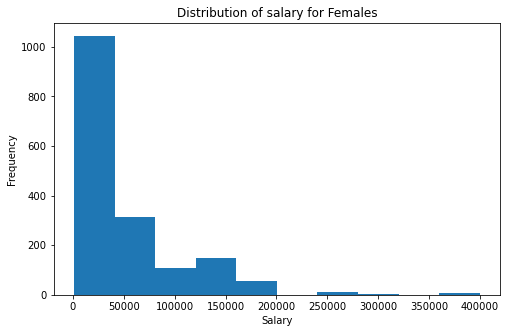

In [24]:
# Display the frequency distribution for females.
df_female['salary'].plot(kind='hist', figsize = (8, 5))
plt.title('Distribution of salary for Females')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.show()

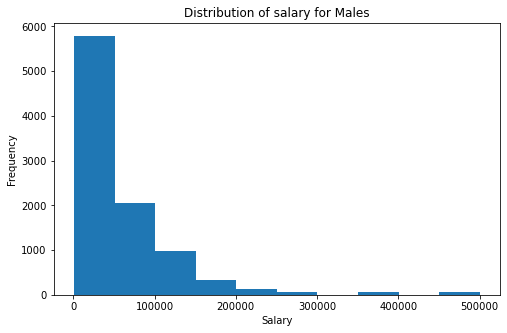

In [25]:
# Display the frequency distribution for males.
df_male['salary'].plot(kind='hist', figsize = (8, 5))
plt.title('Distribution of salary for Males')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.show()

In [26]:
# Show descrptive statistics
summary = {'female': [df_female['salary'].median(), df_female['salary'].min(), df_female['salary'].max(), df_female['salary'].describe().loc['25%'], 
                      df_female['salary'].describe().loc['75%'], df_female['salary'].count()],
           'male': [df_male['salary'].median(), df_male['salary'].min(), df_male['salary'].max(), df_male['salary'].describe().loc['25%'],
                    df_male['salary'].describe().loc['75%'], df_male['salary'].count()]}

descriptive_stats = pd.DataFrame(summary, columns = ['female', 'male'], 
                                 index = ['median', 'min', 'max', '25%', '75%', 'size'])
descriptive_stats

,female,male
median,25000.0,40000.0
min,1000.0,1000.0
max,400000.0,500000.0
25%,3000.0,7500.0
75%,70000.0,80000.0
size,1689.0,9468.0


Descriptive statistics have been computed and reported for each group as shown in the above table. I have reported the salary median, range (minimum and maximum), interquartile range (25% an 75%), and the sample size for the two groups.

### 2b) Two-sample t-test

Since the distribution for both groups are not normal (skewed), it is not appropriate to perform a two-sample t-test because for t-test to be conducted, it needs to assume normal, bell-shaped distribution, which is not the case in with this data. I would need to bootstrap the data first.

### 2c) Boostrapping the data for comparing the mean of salary for males and females

Convert dataframes to numpy arrays

In [27]:
female_array= df_female['salary'].to_numpy()
male_array= df_male['salary'].to_numpy()
print(female_array)
print(male_array)

[ 90000 150000  25000 ...  25000  10000   5000]
[ 40000 300000   5000 ...   1000   2000  70000]


Boostrap the data with 1000 replications.

In [28]:
# Use 1000 replications.
replications = 1000

# create an initial empty list for female and male bootstrapped data.
female_bootstrap = []
male_bootstrap =[]

# get the means for each replications and append it to the list.
for i in range(replications):
    female_avgerage = np.mean(female_array[np.random.randint(len(female_array),size =len(female_array))])
    male_average = np.mean(male_array[np.random.randint(len(male_array), size=len(male_array))])
    female_bootstrap.append(female_avgerage)
    male_bootstrap.append(male_average)

Plot two bootstrapped distributions for males and females. As shown below in the plots, the bootstrapped distribution now becomes normal. This normal shape supports the Central Limit Theorem, which states that the distributions of the means must be normal.

Text(0.5, 1.0, 'Bootstrapped distributions of salary for females')

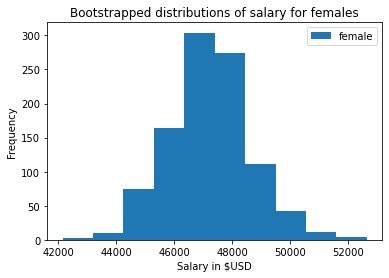

In [29]:
# Plot bootstrapped distribution for females.
plt.hist(female_bootstrap, label = 'female')
plt.legend()
plt.xlabel('Salary in $USD')
plt.ylabel('Frequency')
plt.title('Bootstrapped distributions of salary for females')

Text(0.5, 1.0, 'Bootstrapped distributions of salary for males')

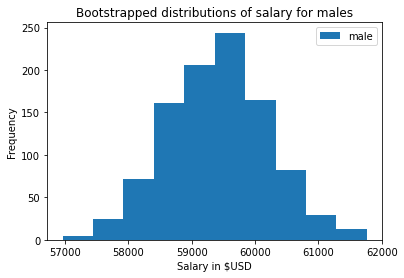

In [30]:
# Plot bootstrapped distribution for males.
plt.hist(male_bootstrap, label = 'male')
plt.legend()
plt.xlabel('Salary in $USD')
plt.ylabel('Frequency')
plt.title('Bootstrapped distributions of salary for males')

Text(0.5, 1.0, 'Bootstrapped distributions of salary for males and females')

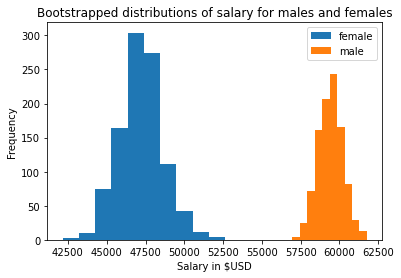

In [31]:
# Plot bootstrapped distribution for both groups.
plt.hist(female_bootstrap, label = 'female')
plt.hist(male_bootstrap, label = 'male')
plt.legend()
plt.xlabel('Salary in $USD')
plt.ylabel('Frequency')
plt.title('Bootstrapped distributions of salary for males and females')

Plot the distribution of the difference in means of males and females. This distribution shows a bell-shaped curve as expected from the CLT.

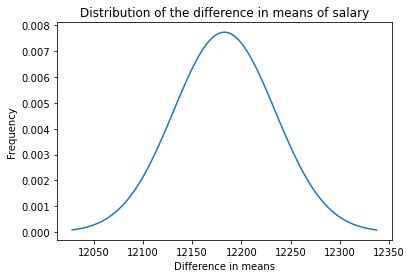

In [32]:
# calculate the sample size and store it in the variables n_female and n_male.
n_female = len(female_bootstrap)
n_male = len(male_bootstrap)

# determine the difference in means between the two groups and store it in the mean_difference variable.
female_mean = np.mean(female_bootstrap)
male_mean = np.mean(male_bootstrap)
mean_difference = male_mean - female_mean

# determine the difference in variance between the two groups and store it in the var_difference variable.
female_var = np.var(female_bootstrap)
male_var = np.var(male_bootstrap)
var_difference = male_var/n_male + female_var/n_female

# Display the distribution of the difference in means between the two groups
sd = math.sqrt(var_difference)
x = np.linspace(mean_difference - 3*sd, mean_difference + 3*sd, 100)
plt.plot(x, stats.norm.pdf(x, mean_difference, sd))
plt.xlabel('Difference in means')
plt.ylabel('Frequency')
plt.title('Distribution of the difference in means of salary')
plt.show()

### 2d) Two-sample t-test for the boostrapped data

From the Central Limit Theorem (CLT), we know that the distribution of the means are normal. As shown in the exploratory data analysis, I have compared the mean salary between males and females with various factors, and it was shown that salary between these two groups were different. To test if this difference is statistically significant, I need to perform two-sample t-test of the bootstrapped data.

In order to compute inferential statistic, we have to test for the homogeneity of variance of the two groups. I will assume that there are equal variances so that I can proceed with the two-sample t-test.

Hypothesis testing: <br>
$H_0$: The salary of males and females of the bootstrapped data do not differ in the population. $\mu_m = \mu_f$ <br>
$H_1$: The salary of males and females of the bootstrapped data differ in the population. $\mu_m != \mu_f$ <br>
<br>
Threshold = 0.05

In [33]:
# Calculate the t-value and the p-value. If p-value is less than the threshold 0.05, we reject the null hypothesis. Else, we fail to reject the null hypothesis.
t, p = stats.ttest_ind(female_bootstrap, male_bootstrap)
print("t-test: t = %g p = %g" % (t, p))

if p < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-test: t = -235.992 p = 0
Reject null hypothesis


Since the p-value is less than 0.05, the result is statistically significant (`p-value = 0 < 0.05`). In conclusion, we reject the null hypothesis and state that the salary of males and females are different.

### 2e) Findings

From computing the descriptive statistics, it was shown that for both groups, the frequency distribution of salary was highly skewed (the majority of people were at the lower end, and only very few people were earning high salary). Because of this imbalance, it was not suitable to perform a t-test to determine whether the salary between the two groups were statistically different due to the fact that t-test assumes normal, bell-shaped distribution. To solve this issue, bootstrapping was performed. The bootsrapped data gave us a more normal distribution of the means as expected from the Central Limit Theorem. A two-sample t-test was then performed on this bootstrapped data to compare the mean salary of the two groups and determine whether this difference is statistically significant. Since the p value was less than the threshold (0.05), it was concluded that the result is statistically significant, and males tend to earn more than females.

## 3 Estimating the difference in average salary by education

### 3a) Descriptive statistics for each group (Bachelor's degree, Master's degree, and Doctoral degree)

In this section, we are interested in looking at the mean salary by education. Hence, I have extracted the relevant columns 'education' and 'salary' and stored it in the dataframe variable, df_education. Then check for any missing values in these columns. We see that there are no missing values. Subsequently, I separated the data into 3 groups: "Bachelor's degree", "Master's degree", and "Doctoral degree" so that I can compute the descriptive statistics for each group separately.

In [34]:
# Extract only the relevant columns: 'education' and 'salary'
df_education = df[['education', 'salary']]
df_education.head() # Display the first 5 rows.

,education,salary
country,,
France,Master’s degree,40000
Australia,Master’s degree,300000
India,Bachelor’s degree,5000
France,Master’s degree,70000
India,Master’s degree,15000


In [35]:
# Check to see if there are any missing values in the 'salary' column. Since there are no missing values, there's no need to drop any values.
print(True in df['salary'].isna())
print(True in df['education'].isna())

False
False


In [36]:
# Separate the data into 3 groups based on education.
df_bachelor = df_education[df_education['education'] == 'Bachelor’s degree']
df_master = df_education[df_education['education'] == 'Master’s degree']
df_doctoral = df_education[df_education['education'] == 'Doctoral degree']

Visualize the distribution with histograms of the three groups to check whether the distribution is normal shape or skewed. Again, the distribution for all three groups are not normal (positvely skewed). Therefore, it is more appropriate to report the median salary instead of the mean. <br>

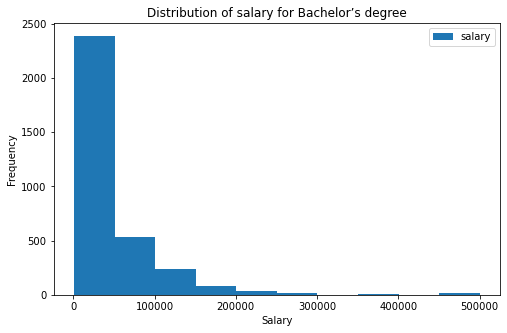

In [37]:
# Plot the distribution of salary for Bahcelor's degree
df_bachelor.plot(kind='hist', figsize = (8, 5))
plt.title('Distribution of salary for Bachelor’s degree')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.show()

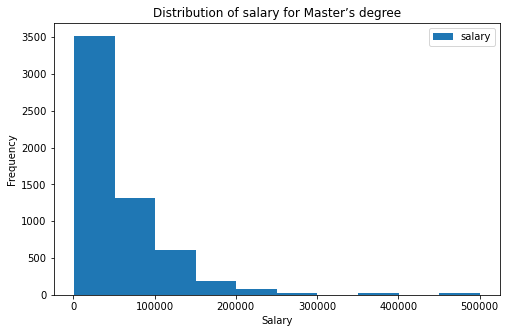

In [38]:
# Plot the distribution of salary for Master's degree
df_master.plot(kind='hist', figsize = (8, 5))
plt.title('Distribution of salary for Master’s degree')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.show()

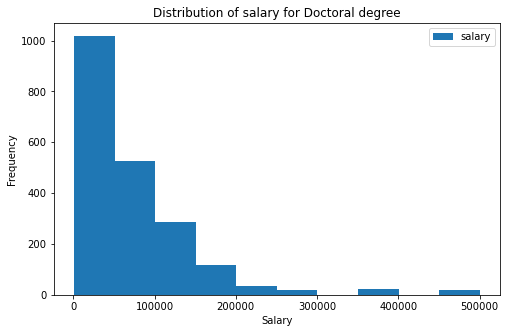

In [39]:
# Plot the distribution of salary for Doctoral degree
df_doctoral.plot(kind='hist', figsize = (8, 5))
plt.title('Distribution of salary for Doctoral degree')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.show()

For descriptive statistics, I have reported the salary median, range (minimum and maximum), interquartile range (25%, 75%), and the sample size.

In [40]:
# Display the descriptive stastistics table.
summary = {'Bachelor': [df_bachelor['salary'].median(), df_bachelor['salary'].min(), df_bachelor['salary'].max(), df_bachelor['salary'].describe().loc['25%'], 
                        df_bachelor['salary'].describe().loc['75%'], df_bachelor['salary'].count()],
           'Master': [df_master['salary'].median(), df_master['salary'].min(), df_master['salary'].max(), df_master['salary'].describe().loc['25%'], 
                      df_master['salary'].describe().loc['75%'], df_master['salary'].count()],
           'Doctoral': [df_doctoral['salary'].median(), df_doctoral['salary'].min(), df_doctoral['salary'].max(), df_doctoral['salary'].describe().loc['25%'],
                        df_doctoral['salary'].describe().loc['75%'], df_doctoral['salary'].count()]}

descriptive_stats = pd.DataFrame(summary, columns = ['Bachelor', 'Master', 'Doctoral'], 
                                 index = ['median', 'min', 'max', '25%', '75%', 'size'])
descriptive_stats

,Bachelor,Master,Doctoral
median,15000.0,40000.0,60000.0
min,1000.0,1000.0,1000.0
max,500000.0,500000.0,500000.0
25%,4000.0,7500.0,15000.0
75%,60000.0,80000.0,100000.0
size,3321.0,5794.0,2042.0


Descriptive statistics, specifically the median, range (minimum to maximum), interquartile range (from 25% to 75%), and the sample size of each three groups are presented in the above table.

### 3b) ANOVA

In order to compute ANOVA, the distribution must be normal. It clear from the histograms that the distribution is skewed. Therefore, it is more suitable to conduct ANOVA. It is more appropriate to bootstrap the data first to make a more symmetrical distribution in the means.

### 3c) Boostrapping the data for comparing the mean of salary by education

Convert dataframes to numpy arrays

In [41]:
# Convert to numpy array and store the values in a variable called bachelor, master, and doctoral.
bachelor_array = df_bachelor['salary'].to_numpy()
master_array = df_master['salary'].to_numpy()
doctoral_array = df_doctoral['salary'].to_numpy()

Boostrap the data

In [42]:
# Use 1000 replications.
replications = 1000

# create an initial empty list for the bootstrap data.
bachelor_bootstrap = []
master_bootstrap = []
doctoral_bootstrap = []

# get the means for each replications and append it to the list.
for i in range(replications):
    bachelor_avgerage = np.mean(bachelor_array[np.random.randint(len(bachelor_array),size =len(bachelor_array))])
    master_average = np.mean(master_array[np.random.randint(len(master_array), size=len(master_array))])
    doctoral_average = np.mean(doctoral_array[np.random.randint(len(doctoral_array), size=len(doctoral_array))])
    bachelor_bootstrap.append(bachelor_avgerage)
    master_bootstrap.append(master_average)
    doctoral_bootstrap.append(doctoral_average)

Plot three separate bootstrapped distributions for three groups. As visualized in the plots below, the bootstrapped distributions for all three groups have normal shape.

Text(0.5, 1.0, "Bootstrapped distributions of salary for Bachelor's degree")

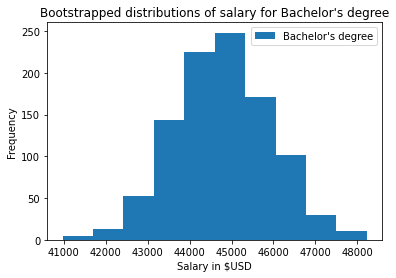

In [43]:
# Display the bootstrapped distribution for Bachelor's degree
plt.hist(bachelor_bootstrap, label = "Bachelor's degree")
plt.legend()
plt.xlabel('Salary in $USD')
plt.ylabel('Frequency')
plt.title("Bootstrapped distributions of salary for Bachelor's degree")

Text(0.5, 1.0, "Bootstrapped distributions of salary for Master's degree")

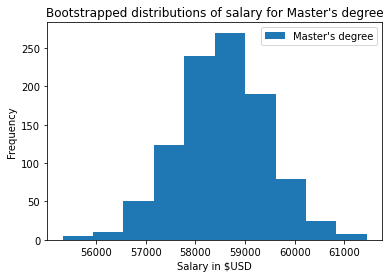

In [44]:
# Display the bootstrapped distribution for Master's degree
plt.hist(master_bootstrap, label = "Master's degree")
plt.legend()
plt.xlabel('Salary in $USD')
plt.ylabel('Frequency')
plt.title("Bootstrapped distributions of salary for Master's degree")

Text(0.5, 1.0, 'Bootstrapped distributions of salary for Doctoral degree')

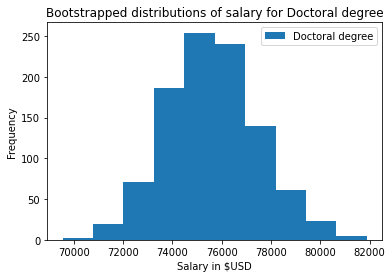

In [45]:
# Display the bootstrapped distribution for Doctoral degree
plt.hist(doctoral_bootstrap, label = "Doctoral degree")
plt.legend()
plt.xlabel('Salary in $USD')
plt.ylabel('Frequency')
plt.title("Bootstrapped distributions of salary for Doctoral degree")

Text(0.5, 1.0, 'Bootstrapped distributions of Salary based on Education')

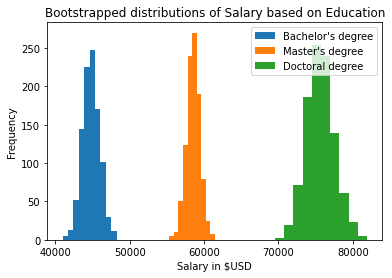

In [52]:
# Display the bootstrapped distribution for all three degrees
plt.hist(bachelor_bootstrap,label = "Bachelor's degree")
plt.hist(master_bootstrap, label = "Master's degree")
plt.hist(doctoral_bootstrap,label = "Doctoral degree")
plt.legend()
plt.xlabel('Salary in $USD')
plt.ylabel('Frequency')
plt.title('Bootstrapped distributions of Salary based on Education')

Plotting the distribution of the difference in means between the three groups.

In [47]:
# determine the sample size for each group
n_bachelor = len(bachelor_bootstrap)
n_master = len(master_bootstrap)
n_doctoral = len(doctoral_bootstrap)

# determine the difference in means
bachelor_mean = np.mean(bachelor_bootstrap)
master_mean = np.mean(master_bootstrap)
doctoral_mean = np.mean(doctoral_bootstrap)
mean_diff1 = bachelor_mean - master_mean
mean_diff2 = bachelor_mean - doctoral_mean
mean_diff3 = master_mean - doctoral_mean

# determine the variance
bachelor_var = np.var(bachelor_bootstrap)
master_var = np.var(master_bootstrap)
doctoral_var = np.var(doctoral_bootstrap)

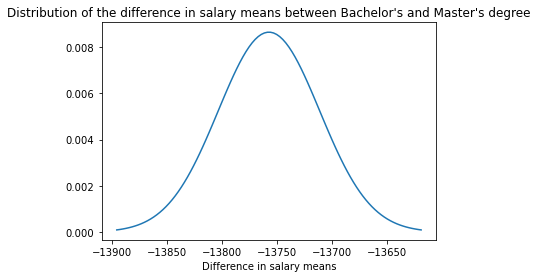

In [48]:
# Plot the distribution of difference in means between Bachelor's and Master's degree
var_diff1 = bachelor_var/n_bachelor + master_var/n_master
mean1 = mean_diff1
sd1 = math.sqrt(var_diff1)

x1 = np.linspace(mean1 - 3*sd1, mean1 + 3*sd1, 100)
plt.plot(x1, stats.norm.pdf(x1, mean1, sd1))
plt.xlabel("Difference in salary means")
plt.title("Distribution of the difference in salary means between Bachelor's and Master's degree")
plt.show()

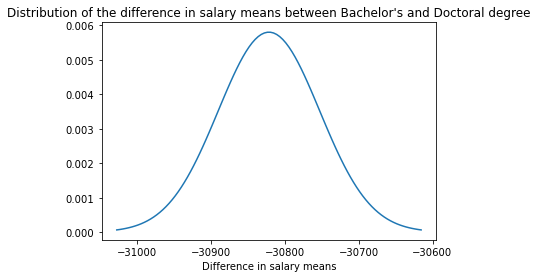

In [49]:
# Plot the distribution of difference in means between Bachelor's and Doctoral degree
var_diff2 = bachelor_var/n_bachelor + doctoral_var/n_doctoral
mean2 = mean_diff2
sd2 = math.sqrt(var_diff2)

x2 = np.linspace(mean2 - 3*sd2, mean2 + 3*sd2, 100)
plt.plot(x2, stats.norm.pdf(x2, mean2, sd2))
plt.xlabel("Difference in salary means")
plt.title("Distribution of the difference in salary means between Bachelor's and Doctoral degree")
plt.show()

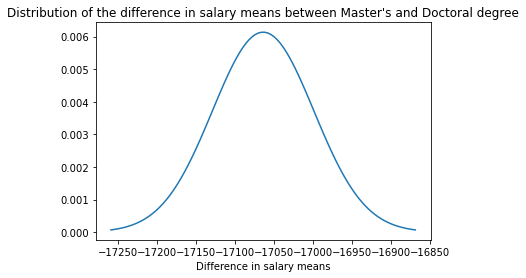

In [50]:
# Plot the distribution of difference in means between Master's and Doctoral degree
var_diff3 = master_var/n_master + doctoral_var/n_doctoral
mean3 = mean_diff3
sd3 = math.sqrt(var_diff3)

x3 = np.linspace(mean3 - 3*sd3, mean3 + 3*sd3, 100)
plt.plot(x3, stats.norm.pdf(x3, mean3, sd3))
plt.xlabel("Difference in salary means")
plt.title("Distribution of the difference in salary means between Master's and Doctoral degree")
plt.show()

### 2d) ANOVA for the boostrapped data

To test if there is a statistically significant difference between the three groups, ANOVA was performed. In order to compute ANOVA, we have to make several assumptions:
1) The samples are independent. <br>
2) Either the distribution is normal or the sample size is larger than 30. <br>
3) Homogeneity of variance of the three groups are equal for the population (i.e. variances are equal). <br>

I will assume that all three above conditions have been met.

Hypothesis testing: <br>
$H_0$: The mean salary corresponding to the three groups (Bachelor's Master's, and Doctoral Degrees) of the bootstrapped data do not differ in the population. <br>
$H_1$: The mean salary corresponding to at least one of the three groups (Bachelor's Master's, and Doctoral Degrees) of the bootstrapped data differ in the population. <br>
<br>
Threshold = 0.05

In [51]:
# Compute the sum of sample sizes for the three groups to get the total sample size, N.
N = len(bachelor_bootstrap)+len(master_bootstrap)+len(doctoral_bootstrap)

## There are three groups, so k is 3
k = 3

# Calculate degrees of freedom between and within
df_btwn = k-1
df_witn = N-k

# Calculate the sum of squared errors, SSE
SSE = np.sum((bachelor_bootstrap-np.mean(bachelor_bootstrap))**2)+np.sum((master_bootstrap-np.mean(master_bootstrap))**2)+np.sum((doctoral_bootstrap-np.mean(doctoral_bootstrap))**2)

# Combine the bootstrapped data for all three groups
data = bachelor_bootstrap + master_bootstrap + doctoral_bootstrap

# Calculate the sum of squares total, SS_total
SS_total = np.sum((data - np.mean(data))**2)

# Calculate the regression sum of squares, SSR
SSR = SS_total - SSE

# Calculate the F and p value
F, p = stats.f_oneway(bachelor_bootstrap, master_bootstrap, doctoral_bootstrap)
print("F-test: F = %g p = %g" % (F, p))

if p < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

F-test: F = 128936 p = 0
Reject null hypothesis


Since the p-value is less than 0.05, the result is statistically significant (`p-value = 0 < 0.05`). In conclusion, we reject the null hypothesis and state that the mean of salary for the three groups (Bachelor's degree, Master's degree, and Doctoral degree) are different.

### 3e) Findings

It was evident that the frequency distribution of salary was highly skewed for all three groups from the descriptive statistics. Because of this imbalance, bootstrapping was performed where we determined the means and plotted the distribution of means. As expected, the distribution of the bootstrapped data turned out to be normal. An ANOVA was then performed on this bootstrapped data to compare the mean salary of the three groups and to determine whether this difference was statistically significant. Since the p value was less than the threshold (0.05), it was concluded that the result is statistically significant, and therefore, education level does have an effect on salary.